# Week 3 Deliverable

In [3]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

sns.set_style('whitegrid')

# Problem definition

Apply regression models to predict the house pricing

# Load the data

In [5]:
#input
df = pd.read_csv('../../data/raw/complete.csv')
print(df.columns)
df.head()

Index(['ID', 'name', 'full_name', 'club', 'club_logo', 'special', 'age',
       'league', 'birth_date', 'height_cm',
       ...
       'prefers_cb', 'prefers_lb', 'prefers_lwb', 'prefers_ls', 'prefers_lf',
       'prefers_lam', 'prefers_lcm', 'prefers_ldm', 'prefers_lcb',
       'prefers_gk'],
      dtype='object', length=185)


,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


# Feature Engineering 

In [6]:
# zipcode to numerical columns
df_league = pd.get_dummies(df['league'])
df = pd.concat([df, df_league], axis=1)
df.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,Saudi Professional League,Scottish Premiership,South African PSL,Spanish Primera División,Spanish Segunda División,Swedish Allsvenskan,Swiss Super League,Turkish Süper Lig,USA Major League Soccer,Ukrainian Premier League
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,0,0,0,1,0,0,0,0,0,0
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,0,0,0,1,0,0,0,0,0,0
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,0,0,0,0,0,0,0,0,0,0
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,0,0,0,1,0,0,0,0,0,0
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# feature engineering
X_columns = ['shot_power', 'heading_accuracy', 'finishing', 'ball_control', 'age', 'penalties', 'positioning', 'potential', 'composure'] + list(df_league.columns)
y_column = ['eur_value']

# Model Training

In [8]:
# split the data

threshold = 0.8
X = df[X_columns]
y = df[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (14395, 50)
y_train (14395, 1)
X_test (3599, 50)
y_test (3599, 1)


# Model Training / Evaluation - Using Split

MODEL LinearRegression
MAE 2025126.7999126555
RMSE 3925307.8069872605


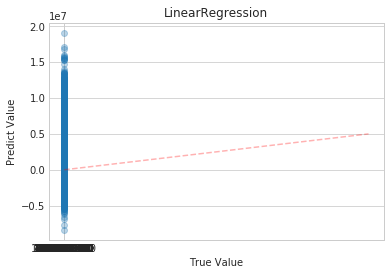

Feature Importance
                                0             1
43       Spanish Primera División  5.615873e+06
21         English Premier League  5.214809e+06
49       Ukrainian Premier League  4.482330e+06
27              German Bundesliga  4.402349e+06
38  Rep. Ireland Premier Division  4.323210e+06

MODEL RandomForestRegressor10
MAE 407199.36093359266
RMSE 1315765.4896563033


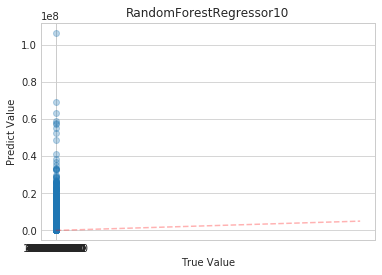

Feature Importance
              0         1
7     potential  0.624359
3  ball_control  0.120961
4           age  0.108464
8     composure  0.071995
6   positioning  0.029279

MODEL RandomForestRegressor100
MAE 374125.5626562934
RMSE 1132277.9676615107


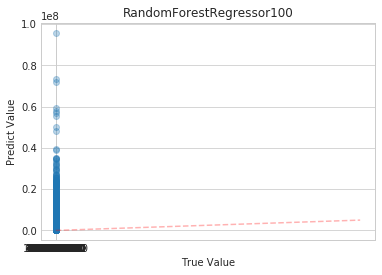

Feature Importance
              0         1
7     potential  0.643488
4           age  0.122383
3  ball_control  0.097958
8     composure  0.071273
6   positioning  0.026253

MODEL KNeighborsRegressor
MAE 842561.8227285357
RMSE 2309416.838976656


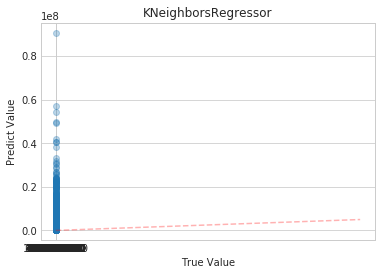


MODEL DecisionTreeRegressor
MAE 539192.8313420395
RMSE 1806786.7851740958


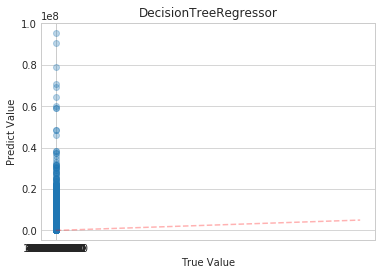

Feature Importance
              0         1
7     potential  0.646837
4           age  0.123196
8     composure  0.100263
3  ball_control  0.071274
6   positioning  0.031968



,model,mae,rmse
2,RandomForestRegressor100,3.741256e+05,1.132278e+06
1,RandomForestRegressor10,4.071994e+05,1.315765e+06
4,DecisionTreeRegressor,5.391928e+05,1.806787e+06
3,KNeighborsRegressor,8.425618e+05,2.309417e+06
0,LinearRegression,2.025127e+06,3.925308e+06


In [9]:
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor())
]
results = []
for m in models:
    print('MODEL', m[0])
    model = m[1]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('MAE', mae)
    print('RMSE', rmse)
    # print the chart
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot(range(0,5000000, 100), range(0,5000000, 100), '--r', alpha=0.3, label='Line1')
    plt.title(m[0])
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    #plt.xlim([0, 15000000])
    #plt.ylim([0, 15000000])
    plt.show()
    results.append([m[0], mae, rmse])
    
    # if there is a feature importance, print top 5
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
        
    print('')

# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'mae', 'rmse']
df_results = df_results.sort_values(by='mae')
df_results

# Model Training / Evaluation - Cross Validation

In [10]:
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100, n_jobs=4)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor())
]

k = 10
results = {}
for m in models:
    print('MODEL', m[0])
    results[m[0]] = {'mae':[], 'rmse':[]}
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        model = m[1]
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results[m[0]]['mae'].append(mae)
        results[m[0]]['rmse'].append(rmse)

MODEL LinearRegression
MODEL RandomForestRegressor10
MODEL RandomForestRegressor100
MODEL KNeighborsRegressor
MODEL DecisionTreeRegressor


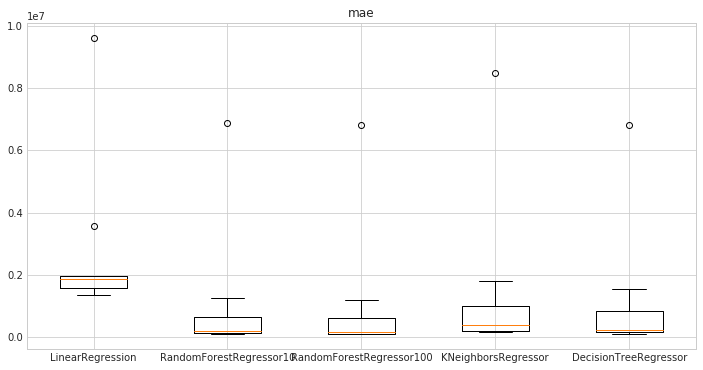

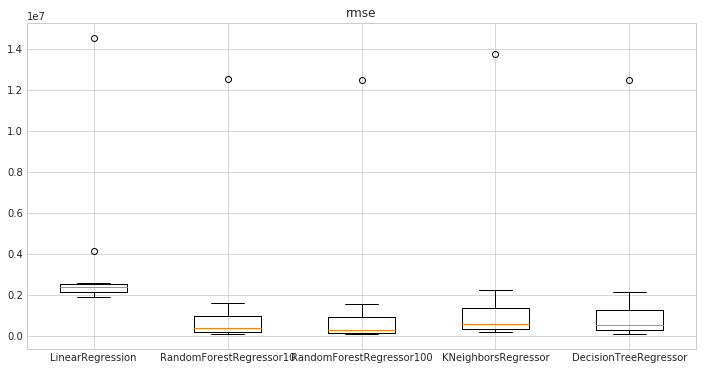

In [11]:
for metric in ['mae', 'rmse']:
    values = []
    labels = []
    for model, result_values in results.items():
        for m, v in result_values.items():
            if m == metric:
                labels.append(model)
                values.append(v)
    plt.figure(figsize=(12,6))
    plt.title(metric)
    plt.boxplot(values)
    plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
    plt.show()